In [2]:
import os
os.chdir('/Users/willychien/20FDS/Assignment/')
print(os.getcwd())

/Users/willychien/20FDS/Assignment


In [3]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [314]:
filename = 'Sentiment labeled data.csv'
df = pd.read_csv(filename, encoding ='utf_8')

df.head()

/Users/willychien/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,2,5,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,text,user_id,in_reply_to_screen_name,followers_count,retweet_count,created_at,id_str,place_type,full_place_name,country_code,city,state,before_stemmitizing,final,trump_sentiment_set,hillary_sentiment_set,trump_sentiment_guess,hillary_sentiment_guess
0,@theblaze @realDonaldTrump https://t.co/TY9DlZ...,366636488.0,theblaze,186.0,0.0,Fri Aug 12 10:04:00 +0000 2016,7.640397e+17,city,"Frontenac, MO",US,Frontenac,MO,"['@theblaze', '@realdonaldtrump']",@theblaz @realdonaldtrump,NaN,NaN,Neutral,Neutral
1,@BarackObama \n@FBI\n@LORETTALYNCH \nALL IN CO...,82496193.0,BarackObama,531.0,0.0,Fri Aug 12 10:04:02 +0000 2016,7.640397e+17,city,"Baton Rouge, LA",US,Baton Rouge,LA,"['@barackobama', '@fbi', '@lorettalynch', 'col...",@barackobama @fbi @lorettalynch collus togeth ...,NaN,NaN,Positive,Negative
2,@theblaze @realDonaldTrump https://t.co/n050DB...,366636488.0,theblaze,186.0,0.0,Fri Aug 12 10:04:10 +0000 2016,7.640398e+17,city,"Frontenac, MO",US,Frontenac,MO,"['@theblaze', '@realdonaldtrump']",@theblaz @realdonaldtrump,NaN,NaN,Neutral,Neutral
3,#CNN #newday clear #Trump deliberately throwin...,769208504.0,NaN,2652.0,0.0,Fri Aug 12 10:04:30 +0000 2016,7.640398e+17,city,"Baltimore, MD",US,Baltimore,MD,"['#cnn', '#newday', 'clear', '#trump', 'delibe...",#cnn #newday clear #trump deliber throw race h...,NaN,NaN,Neutral,Neutral
4,"@realDonaldTrump, you wouldn't recognize a lie...",41043316.0,realDonaldTrump,183.0,0.0,Fri Aug 12 10:04:46 +0000 2016,7.640399e+17,city,"Palm Springs, CA",US,Palm Springs,CA,"['@realdonaldtrump', 'recognize', 'lie', 'came...",@realdonaldtrump recogn lie came mouth continu...,Negative,NaN,Negative,Neutral


In [315]:
drop = ["in_reply_to_screen_name", "retweet_count", "place_type","full_place_name","country_code","before_stemmitizing", "trump_sentiment_set", "hillary_sentiment_set"]
df = df.drop(drop, axis =1)

# 1. Explore the processed tweets with sentiment labels

### Examine correlation

In [6]:
# Examine the correlation bwteen sentiments

sent_list = ["state","trump_sentiment_guess", "hillary_sentiment_guess"] # Inspect columns with sentiments labels and states
sent_corr = df[sent_list].apply(lambda x : pd.factorize(x)[0]).corr() # Factorize the catergorical variable
sent_corr

,state,trump_sentiment_guess,hillary_sentiment_guess
state,1.000000,0.206441,0.213365
trump_sentiment_guess,0.206441,1.000000,0.543837
hillary_sentiment_guess,0.213365,0.543837,1.000000


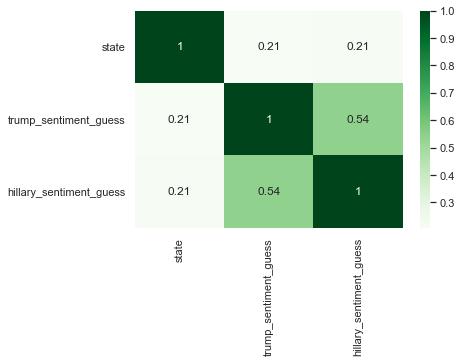

In [7]:
# Plot a heatmap for correlation 

sns.set(font_scale=1)
sns.heatmap(sent_corr, cmap="Greens", annot=True, 
            xticklabels=sent_corr.columns.values,
            yticklabels=sent_corr.columns.values)

In [321]:
t_count = df.trump_sentiment_guess.value_counts()
h_count = df.hillary_sentiment_guess.value_counts()
all_count = pd.concat([h_count, t_count], axis = 1) 
all_count.head()

,hillary_sentiment_guess,trump_sentiment_guess
Neutral,327115,322374
Positive,36042,43542
Negative,32274,29515


<Figure size 360x360 with 0 Axes>

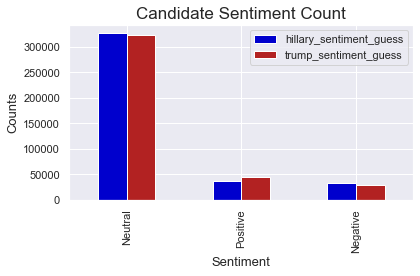

In [333]:
plt.figure(figsize=(5, 5))
sns.set(font_scale=1)
#sns.set_style(style="grat")
all_count.plot(kind="bar", color=['mediumblue','firebrick']) 

plt.title("Candidate Sentiment Count", fontsize=17)
plt.xlabel("Sentiment", fontsize = 13)
plt.ylabel("Counts", fontsize = 13)
plt.tight_layout()
plt.savefig('Candidate Sentiment Count', dpi=300)

In [ ]:
all_count["hillary_sentiment_ratio"] = all_count["hillary_sentiment_guess"] / all_count.hillary_sentiment_guess.sum()
all_count["trump_sentiment_ratio"] = all_count["trump_sentiment_guess"] / all_count.trump_sentiment_guess.sum()
round(all_count,2)

### Plot a wordcloud 

In [ ]:
def draw_wordcloud(sentiment_guess, sentiment):
    # Generate wordlist
    word_list = []
    for i in df[df[sentiment_guess] == sentiment].final: 
        i = str(i) 
        seperate = i.split(" ")
        word_list.extend(seperate)

    # Generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate(str(word_list))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(sentiment_guess.split("_")[0].upper() +" "+sentiment.upper())
    plt.show()

In [ ]:
draw_wordcloud("trump_sentiment_guess", "Positive")

In [ ]:
draw_wordcloud("trump_sentiment_guess", "Negative")

In [ ]:
draw_wordcloud("hillary_sentiment_guess", "Positive")

In [ ]:
draw_wordcloud("hillary_sentiment_guess", "Negative")

# 2. Merge with external datasets

In [11]:
# Read the socioeconomic datasets as social_df

social_df = pd.read_csv (r'socioeconomic_dataset.csv')
social_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population
0,United States,US,0.601245,44268996,14.0,57617,322941311
1,Alabama,AL,0.591243,814197,17.2,46309,4863525
2,Alaska,AK,0.614662,71916,9.9,76144,741456
3,Arizona,AZ,0.561461,1107153,16.4,53481,6941072
4,Arkansas,AR,0.531645,497388,17.2,44406,2989918


### 2.1 Calculate the tweets charecterictics and aggregate at a state level

In [12]:
# Calculate how many tweets per state 

tweet_per_state = pd.DataFrame(df.state.value_counts()).reset_index()
tweet_per_state = tweet_per_state.rename(columns={'state':'tweet_counts', 'index':'state'})
tweet_per_state["state"] = tweet_per_state["state"].astype(str).str.replace(r' ', '')

social_df = pd.merge(social_df, tweet_per_state, left_on = "state_code", right_on="state")
social_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,state,tweet_counts
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,AL,5642
1,Alaska,AK,0.614662,71916,9.9,76144,741456,AK,946
2,Arizona,AZ,0.561461,1107153,16.4,53481,6941072,AZ,12953
3,Arkansas,AR,0.531645,497388,17.2,44406,2989918,AR,1353
4,California,CA,0.581980,5527621,14.4,67715,39167117,CA,60692


In [22]:
# Count how many users per state

df["aux"] = 1 
unique_user_df = df.groupby(["state", "user_id" ], as_index= False)["aux"].sum()
unique_user_df.head()

,state,user_id,aux
0,AK,5574972.0,1
1,AK,16644373.0,1
2,AK,17140862.0,2
3,AK,18701256.0,27
4,AK,19574770.0,1


In [24]:
unique_user_count = pd.DataFrame(unique_user_df.state.value_counts()).reset_index()
unique_user_count = unique_user_count.rename(columns={'state':'unique_user_counts', 'index':'state'})
unique_user_count.head()

,state,unique_user_counts
0,CA,7850
1,NY,4883
2,TX,4376
3,FL,3956
4,IL,2113


In [25]:
# Merge the user counts into social_df
unique_user_count["state"] = unique_user_count["state"].astype(str).str.replace(r' ', '')
social_df = pd.merge(social_df, unique_user_count, left_on = "state_code", right_on="state")
social_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,state_x,tweet_counts,state_y,unique_user_counts
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,AL,5642,AL,542
1,Alaska,AK,0.614662,71916,9.9,76144,741456,AK,946,AK,86
2,Arizona,AZ,0.561461,1107153,16.4,53481,6941072,AZ,12953,AZ,1347
3,Arkansas,AR,0.531645,497388,17.2,44406,2989918,AR,1353,AR,270
4,California,CA,0.581980,5527621,14.4,67715,39167117,CA,60692,CA,7850


In [31]:
# Calculate tweet per user
social_df["tweet_per_user"] = social_df["tweet_counts"]/social_df["unique_user_counts"]
social_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,tweet_counts,unique_user_counts,tweet_per_user,twitter_user_per10k
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,1.114418
1,Alaska,AK,0.614662,71916,9.9,76144,741456,946,86,11.000000,1.159880
2,Arizona,AZ,0.561461,1107153,16.4,53481,6941072,12953,1347,9.616184,1.940622
3,Arkansas,AR,0.531645,497388,17.2,44406,2989918,1353,270,5.011111,0.903035
4,California,CA,0.581980,5527621,14.4,67715,39167117,60692,7850,7.731465,2.004232


In [28]:
# Remove unessary columns 
social_df = social_df.drop(["state_x","state_y"], axis = 1)
social_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,tweet_counts,unique_user_counts,tweet_per_user
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594
1,Alaska,AK,0.614662,71916,9.9,76144,741456,946,86,11.000000
2,Arizona,AZ,0.561461,1107153,16.4,53481,6941072,12953,1347,9.616184
3,Arkansas,AR,0.531645,497388,17.2,44406,2989918,1353,270,5.011111
4,California,CA,0.581980,5527621,14.4,67715,39167117,60692,7850,7.731465


In [30]:
# Calculate twitter_user_per10k

social_df["twitter_user_per10k"] = social_df["unique_user_counts"]/social_df["population"] *10000
social_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,tweet_counts,unique_user_counts,tweet_per_user,twitter_user_per10k
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,1.114418
1,Alaska,AK,0.614662,71916,9.9,76144,741456,946,86,11.000000,1.159880
2,Arizona,AZ,0.561461,1107153,16.4,53481,6941072,12953,1347,9.616184,1.940622
3,Arkansas,AR,0.531645,497388,17.2,44406,2989918,1353,270,5.011111,0.903035
4,California,CA,0.581980,5527621,14.4,67715,39167117,60692,7850,7.731465,2.004232


In [45]:
# Calculate tweet_per10k

social_df["tweet_per10k"] = social_df["tweet_counts"]/social_df["population"] *10000
social_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,tweet_counts,unique_user_counts,tweet_per_user,twitter_user_per10k,tweet_per10k
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,1.114418,11.600639
1,Alaska,AK,0.614662,71916,9.9,76144,741456,946,86,11.000000,1.159880,12.758680
2,Arizona,AZ,0.561461,1107153,16.4,53481,6941072,12953,1347,9.616184,1.940622,18.661383
3,Arkansas,AR,0.531645,497388,17.2,44406,2989918,1353,270,5.011111,0.903035,4.525208
4,California,CA,0.581980,5527621,14.4,67715,39167117,60692,7850,7.731465,2.004232,15.495652


### 2.2 Build a sentiment dataframe to check the positive/negative sentiments of each candidate

In [32]:
# First, calculate the sum of pos/neg tweets of Trump using one-hot encoding

t_df = df[["state","trump_sentiment_guess","hillary_sentiment_guess"]]
t_df = pd.concat([t_df, pd.get_dummies(t_df.trump_sentiment_guess)], axis = 1) 

trump_sent = t_df.groupby(["state"], as_index = False).sum()
trump_sent.head()

,state,Negative,Neutral,Positive
0,AK,319.0,492.0,135.0
1,AL,648.0,3145.0,1849.0
2,AR,213.0,854.0,286.0
3,AZ,2377.0,6583.0,3993.0
4,CA,14412.0,31914.0,14366.0


In [33]:
# Second, calculate the sum of pos/neg tweets of Hilary using one-hot encoding

h_df = df[["state","hillary_sentiment_guess"]]
h_df = pd.concat([h_df, pd.get_dummies(h_df.hillary_sentiment_guess)], axis = 1) 
hilary_sent = h_df.groupby(["state"], as_index = False).sum()
hilary_sent.head()

,state,Negative,Neutral,Positive
0,AK,121.0,546.0,279.0
1,AL,1449.0,3277.0,916.0
2,AR,222.0,832.0,299.0
3,AZ,3552.0,6490.0,2911.0
4,CA,12506.0,31461.0,16725.0


In [34]:
# Calculate the trump-pos/nege ratio at a state level

t_sent_df = trump_sent.groupby("state", as_index= False).sum()
t_sent_df["trump_neg_ratio"] = t_sent_df["Negative"]/(t_sent_df["Negative"] + t_sent_df["Positive"] + t_sent_df["Neutral"])
t_sent_df["trump_pos_ratio"] = t_sent_df["Positive"]/(t_sent_df["Negative"] + t_sent_df["Positive"] + t_sent_df["Neutral"])
t_sent_df.head()

,state,Negative,Neutral,Positive,trump_neg_ratio,trump_pos_ratio
0,AK,319.0,492.0,135.0,0.337209,0.142706
1,AL,648.0,3145.0,1849.0,0.114853,0.327721
2,AR,213.0,854.0,286.0,0.157428,0.211382
3,AZ,2377.0,6583.0,3993.0,0.183510,0.308268
4,CA,14412.0,31914.0,14366.0,0.237461,0.236703


In [35]:
# Calculate the hilary-pos/nege ratio at a state level

h_sent_df = hilary_sent.groupby("state", as_index= False).sum()
h_sent_df["hilary_neg_ratio"] = h_sent_df["Negative"]/(h_sent_df["Negative"] + h_sent_df["Positive"] + h_sent_df["Neutral"])
h_sent_df["hilary_pos_ratio"] = h_sent_df["Positive"]/(h_sent_df["Negative"] + h_sent_df["Positive"] + h_sent_df["Neutral"])
h_sent_df.head()

,state,Negative,Neutral,Positive,hilary_neg_ratio,hilary_pos_ratio
0,AK,121.0,546.0,279.0,0.127907,0.294926
1,AL,1449.0,3277.0,916.0,0.256824,0.162354
2,AR,222.0,832.0,299.0,0.164080,0.220990
3,AZ,3552.0,6490.0,2911.0,0.274222,0.224736
4,CA,12506.0,31461.0,16725.0,0.206057,0.275572


In [36]:
# Merge two into one

sent_df = pd.merge(t_sent_df, h_sent_df, left_on = "state", right_on = "state")
sent_df.head()

,state,Negative_x,Neutral_x,Positive_x,trump_neg_ratio,trump_pos_ratio,Negative_y,Neutral_y,Positive_y,hilary_neg_ratio,hilary_pos_ratio
0,AK,319.0,492.0,135.0,0.337209,0.142706,121.0,546.0,279.0,0.127907,0.294926
1,AL,648.0,3145.0,1849.0,0.114853,0.327721,1449.0,3277.0,916.0,0.256824,0.162354
2,AR,213.0,854.0,286.0,0.157428,0.211382,222.0,832.0,299.0,0.164080,0.220990
3,AZ,2377.0,6583.0,3993.0,0.183510,0.308268,3552.0,6490.0,2911.0,0.274222,0.224736
4,CA,14412.0,31914.0,14366.0,0.237461,0.236703,12506.0,31461.0,16725.0,0.206057,0.275572


In [37]:
# Calcuate as score

sent_df["trump_score"] = sent_df["Negative_x"]*(-1)+ sent_df["Positive_x"]
sent_df["hilary_score"] = sent_df["Negative_y"]*(-1)+ sent_df["Positive_y"]

sent_df = sent_df.drop(["Negative_x", "Negative_y", "Neutral_x","Neutral_y", "Positive_x", "Positive_y"], axis = 1)

sent_df.head()

,state,trump_neg_ratio,trump_pos_ratio,hilary_neg_ratio,hilary_pos_ratio,trump_score,hilary_score
0,AK,0.337209,0.142706,0.127907,0.294926,-184.0,158.0
1,AL,0.114853,0.327721,0.256824,0.162354,1201.0,-533.0
2,AR,0.157428,0.211382,0.164080,0.220990,73.0,77.0
3,AZ,0.183510,0.308268,0.274222,0.224736,1616.0,-641.0
4,CA,0.237461,0.236703,0.206057,0.275572,-46.0,4219.0


In [46]:
# Merge the sent_df to social_df 

sent_df["state"] = sent_df["state"].astype(str).str.replace(r' ', '')
merged_df = pd.merge(social_df, sent_df, left_on ="state_code", right_on = "state")
merged_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,tweet_counts,unique_user_counts,tweet_per_user,twitter_user_per10k,tweet_per10k,state,trump_neg_ratio,trump_pos_ratio,hilary_neg_ratio,hilary_pos_ratio,trump_score,hilary_score
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,1.114418,11.600639,AL,0.114853,0.327721,0.256824,0.162354,1201.0,-533.0
1,Alaska,AK,0.614662,71916,9.9,76144,741456,946,86,11.000000,1.159880,12.758680,AK,0.337209,0.142706,0.127907,0.294926,-184.0,158.0
2,Arizona,AZ,0.561461,1107153,16.4,53481,6941072,12953,1347,9.616184,1.940622,18.661383,AZ,0.183510,0.308268,0.274222,0.224736,1616.0,-641.0
3,Arkansas,AR,0.531645,497388,17.2,44406,2989918,1353,270,5.011111,0.903035,4.525208,AR,0.157428,0.211382,0.164080,0.220990,73.0,77.0
4,California,CA,0.581980,5527621,14.4,67715,39167117,60692,7850,7.731465,2.004232,15.495652,CA,0.237461,0.236703,0.206057,0.275572,-46.0,4219.0


### 2.3 Election result: calcuate by obtained-vote ratio

In [39]:
# Read the result dataset and group at a state & candidate level 

result_df = pd.read_csv (r'us-election-2016-results-by-county.csv')
result_df = result_df.groupby(["StateCode", "Candidate"], as_index = False)[["CountyTotalVote", "VoteCount"]].sum()
result_df["vote_obtained_ratio"] = result_df.VoteCount/result_df.CountyTotalVote
result_df.tail()

,StateCode,Candidate,CountyTotalVote,VoteCount,vote_obtained_ratio
250,WY,Castle,248742,2038.0,0.008193
251,WY,Clinton,248742,55949.0,0.224928
252,WY,Johnson,248742,13285.0,0.053409
253,WY,Stein,248742,2512.0,0.010099
254,WY,Trump,248742,174248.0,0.700517


In [47]:
# Merged dataframes with election results 

merged_df = pd.merge(merged_df, result_df, left_on = "state_code", right_on = "StateCode" )
merged_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,tweet_counts,unique_user_counts,tweet_per_user,...,trump_pos_ratio,hilary_neg_ratio,hilary_pos_ratio,trump_score,hilary_score,StateCode,Candidate,CountyTotalVote,VoteCount,vote_obtained_ratio
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,0.327721,0.256824,0.162354,1201.0,-533.0,AL,Castle,2078165,0.0,0.000000
1,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,0.327721,0.256824,0.162354,1201.0,-533.0,AL,Clinton,2078165,718084.0,0.345538
2,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,0.327721,0.256824,0.162354,1201.0,-533.0,AL,Johnson,2078165,43869.0,0.021109
3,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,0.327721,0.256824,0.162354,1201.0,-533.0,AL,Stein,2078165,9287.0,0.004469
4,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,0.327721,0.256824,0.162354,1201.0,-533.0,AL,Trump,2078165,1306925.0,0.628884


### Map the winner of each state (will use this df later)

In [41]:
# Check who won the most at each state

highest_cand_id = result_df.groupby("StateCode")["vote_obtained_ratio"].idxmax()
win_df = result_df.iloc[highest_cand_id,]
win_df.rename(columns={"Candidate":"Winner"}, inplace = True)
win_df.head()

/Users/willychien/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,StateCode,Winner,CountyTotalVote,VoteCount,vote_obtained_ratio
4,AK,Trump,246588,130415.0,0.528878
9,AL,Trump,2078165,1306925.0,0.628884
14,AR,Trump,1121684,677904.0,0.604363
19,AZ,Trump,1960053,972900.0,0.496364
21,CA,Clinton,8930459,5488261.0,0.614555


In [42]:
# One hot enconding to the winner

win_df = pd.concat([win_df, pd.get_dummies(win_df.Winner)], axis = 1) 
win_df = win_df[["StateCode","Winner", "Clinton", "Trump"]]
win_df.head()

,StateCode,Winner,Clinton,Trump
4,AK,Trump,0,1
9,AL,Trump,0,1
14,AR,Trump,0,1
19,AZ,Trump,0,1
21,CA,Clinton,1,0


In [48]:
merged_df = pd.merge(merged_df, win_df, left_on = "state_code", right_on = "StateCode" )
merged_df.head()

,state_name,state_code,turnout_rate,poverty_pop,poverty_rate,median_household_income,population,tweet_counts,unique_user_counts,tweet_per_user,...,hilary_score,StateCode_x,Candidate,CountyTotalVote,VoteCount,vote_obtained_ratio,StateCode_y,Winner,Clinton,Trump
0,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,-533.0,AL,Castle,2078165,0.0,0.000000,AL,Trump,0,1
1,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,-533.0,AL,Clinton,2078165,718084.0,0.345538,AL,Trump,0,1
2,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,-533.0,AL,Johnson,2078165,43869.0,0.021109,AL,Trump,0,1
3,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,-533.0,AL,Stein,2078165,9287.0,0.004469,AL,Trump,0,1
4,Alabama,AL,0.591243,814197,17.2,46309,4863525,5642,542,10.409594,...,-533.0,AL,Trump,2078165,1306925.0,0.628884,AL,Trump,0,1


In [105]:
merged_df.columns

Index(['state_name', 'state_code', 'turnout_rate', 'poverty_pop',
       'poverty_rate', 'median_household_income', 'population', 'tweet_counts',
       'unique_user_counts', 'tweet_per_user', 'twitter_user_per10k',
       'tweet_per10k', 'state', 'trump_neg_ratio', 'trump_pos_ratio',
       'hilary_neg_ratio', 'hilary_pos_ratio', 'trump_score', 'hilary_score',
       'StateCode_x', 'Candidate', 'CountyTotalVote', 'VoteCount',
       'vote_obtained_ratio', 'StateCode_y', 'Winner', 'Clinton', 'Trump'],
      dtype='object')

### 2.4 Examine the correlations between variables

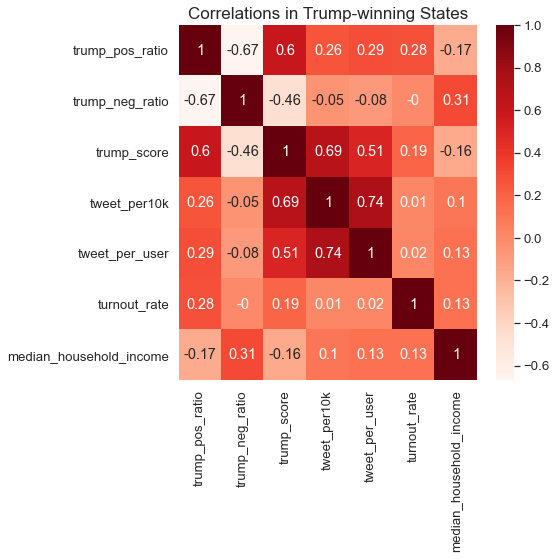

In [221]:
# Calculate the correlations in the states that Trump won

trump_df = merged_df[merged_df["Winner"] == "Trump"]
# if we wanna see Trump  overall performace in all state: merged_df["Candidate"] == "Trump"

corr = round(trump_df[["trump_pos_ratio","trump_neg_ratio", "trump_score", 
                 "tweet_per10k",'tweet_per_user',
                 "turnout_rate", "median_household_income"]].corr(),2)

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr, cmap="Reds", annot=True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.title('Correlations in Trump-winning States', fontsize = 17)
plt.tight_layout()

plt.savefig('correlations_in_trump_states.png', dpi=300)

In [198]:
round(corr,3)

,trump_pos_ratio,trump_score,tweet_per10k,turnout_rate,poverty_rate,median_household_income
trump_pos_ratio,1.000,0.604,0.263,0.285,0.120,-0.174
trump_score,0.604,1.000,0.685,0.195,0.177,-0.161
tweet_per10k,0.263,0.685,1.000,0.005,0.114,0.100
turnout_rate,0.285,0.195,0.005,1.000,-0.319,0.132
poverty_rate,0.120,0.177,0.114,-0.319,1.000,-0.855
median_household_income,-0.174,-0.161,0.100,0.132,-0.855,1.000


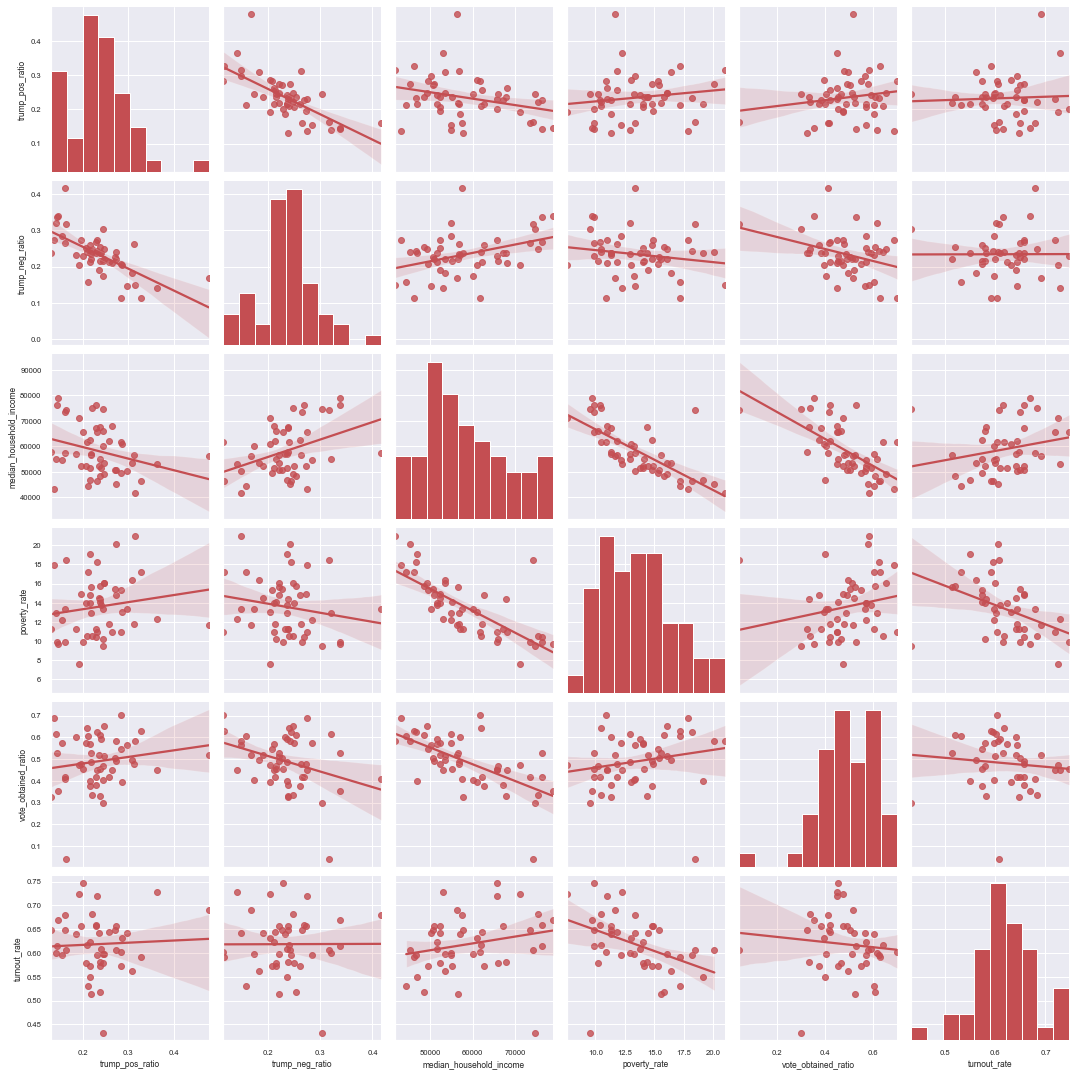

In [50]:
# Insepct data distribution with respective paired variables

#Here looking at all the states (with Trump vote_obtained_ratio)
trump_df = merged_df[merged_df["Candidate"] == "Trump"]  

trump_list =["trump_pos_ratio", "trump_neg_ratio", "median_household_income", "poverty_rate", "vote_obtained_ratio", "turnout_rate"]
sns.pairplot(trump_df[trump_list], kind="reg", plot_kws=dict(color="r"), diag_kws=dict(color="r"))

plt.tight_layout()
#plt.savefig('pairplot_trump.png', dpi=300)



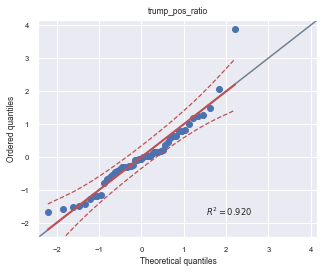

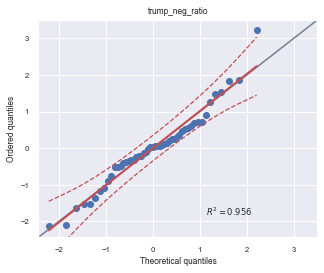

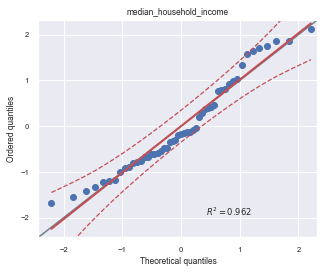

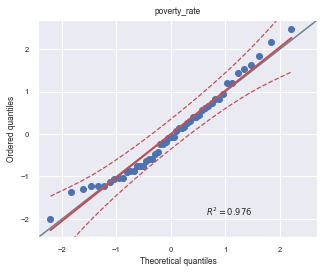

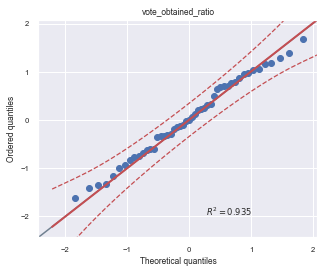

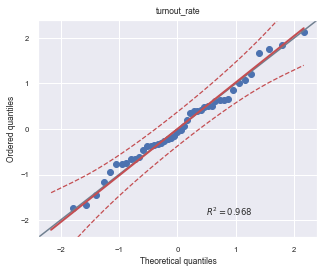

In [51]:
# qqplot 

import pingouin as pg

for i in trump_list:
    ax = pg.qqplot(trump_df[i], dist='norm')
    ax.set_title(i)

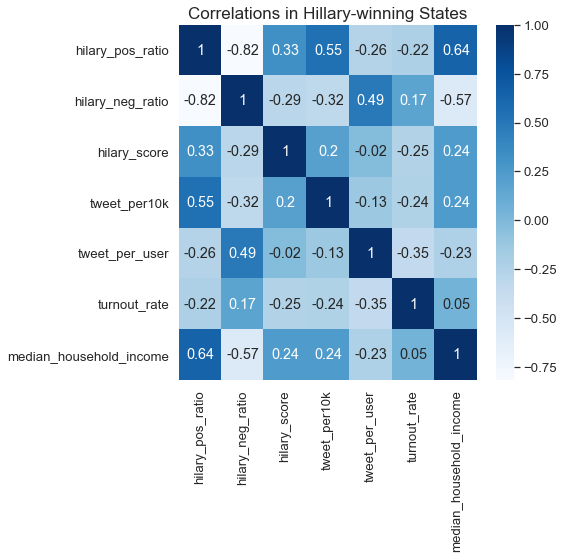

In [219]:
# Calculate the correlations in the states that Hilary won


hilary_df = merged_df[merged_df["Winner"] == "Clinton"]
# if we wanna see Hilary overall performace in all state: merged_df["Candidate"] == "Clinton"

corr = round(hilary_df[["hilary_pos_ratio", "hilary_neg_ratio", "hilary_score",
                  "tweet_per10k", 'tweet_per_user',
                  "turnout_rate", "median_household_income"]].corr(),2)

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr, cmap="Blues", annot=True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.title('Correlations in Hillary-winning States', fontsize = 17)

plt.tight_layout()
plt.savefig('correlations_in_Hillary_states.png', dpi=300)

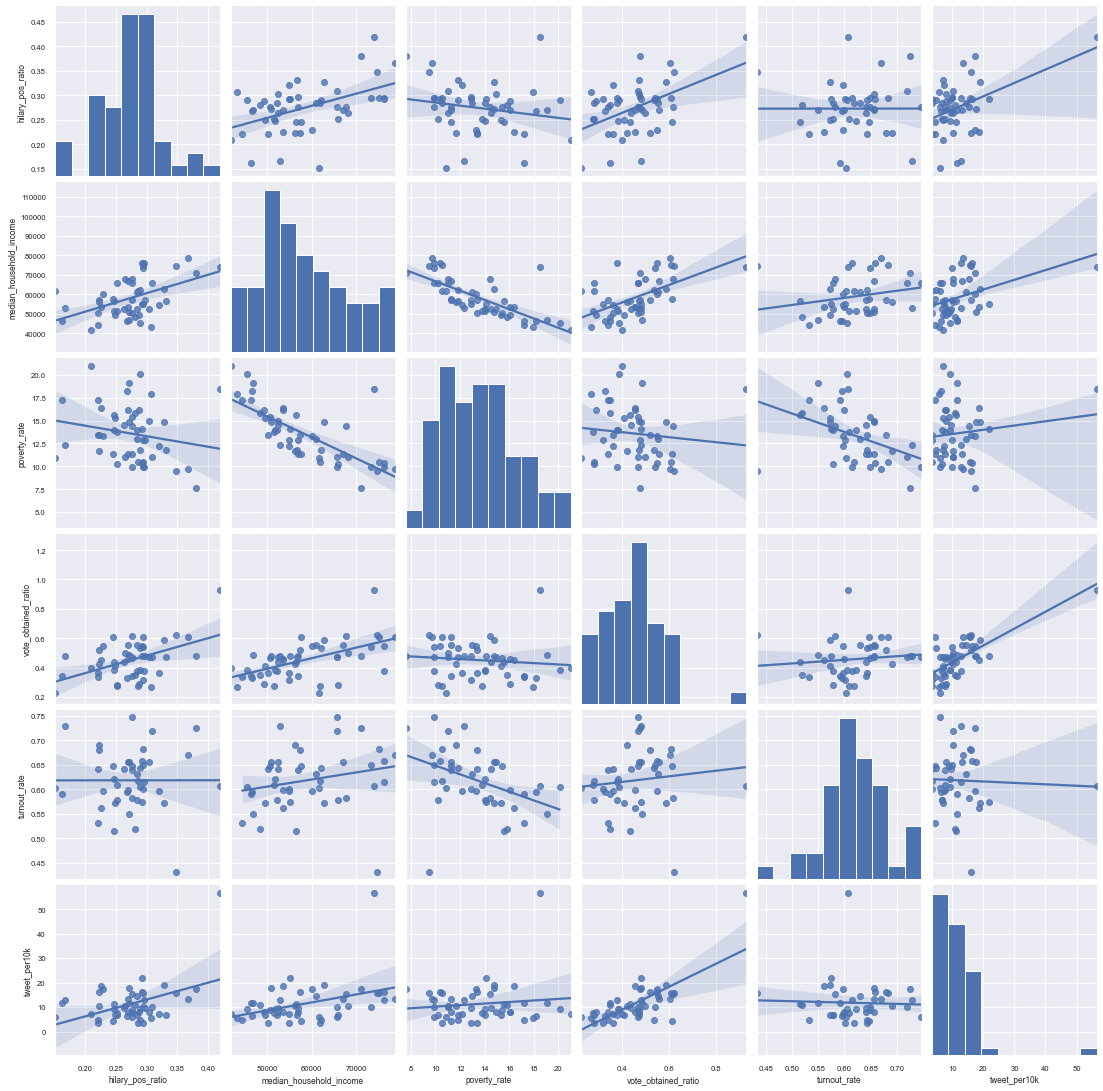

In [148]:
# Insepct data distribution with respective paired variables 

hilary_df = merged_df[merged_df["Candidate"] == "Clinton"]

hilary_list = ["hilary_pos_ratio", "median_household_income", "poverty_rate", "vote_obtained_ratio", "turnout_rate", "tweet_per10k"]
sns.pairplot(hilary_df[hilary_list], kind="reg",
             plot_kws=dict(color="b"), diag_kws=dict(color="b"))

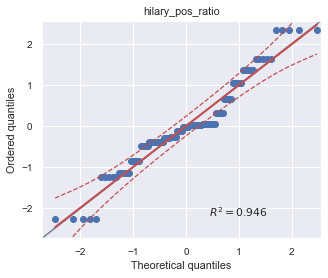

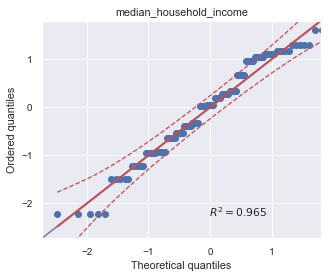

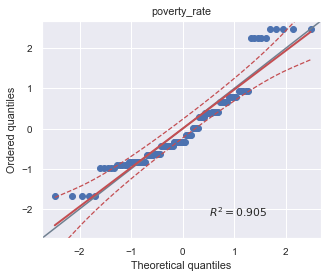

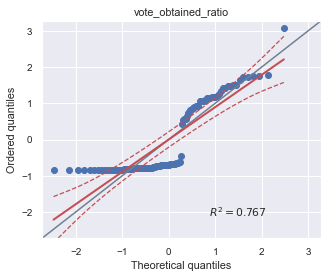

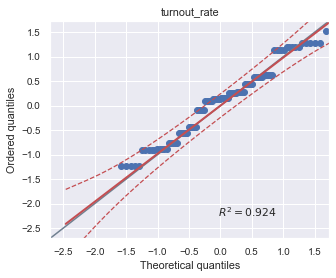

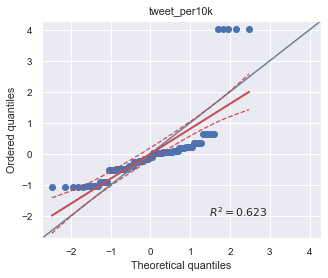

In [54]:
# qqplot 

hilary_list = ["hilary_pos_ratio", "median_household_income", "poverty_rate", "vote_obtained_ratio", "turnout_rate", "tweet_per10k"]

for i in hilary_list:
    ax = pg.qqplot(hilary_df[i], dist='norm')
    ax.set_title(i)

### 2.5 Choropleth map

In [248]:
import geopandas as gpd

fp = '/Users/willychien/20FDS/Workshop 2/states.shp'
map_df = gpd.read_file(fp)
map_df.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


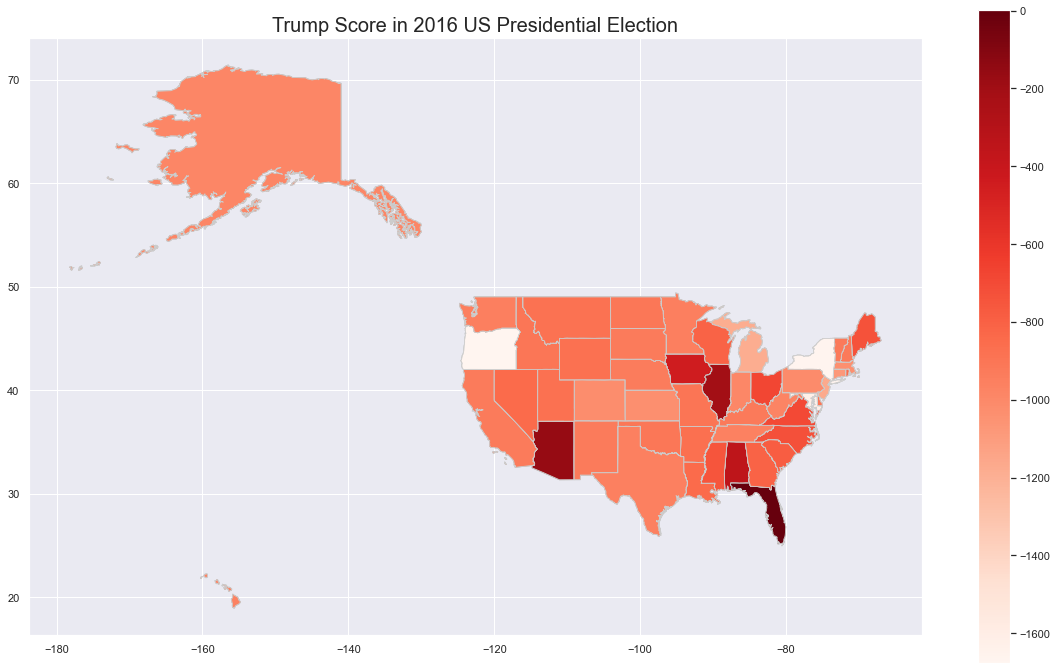

In [243]:
# Join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('STATE_ABBR').join(merged_df.set_index('state_code'))

# Set a variable
variable = "trump_score"
vmin, vmax = merged_df["trump_score"].min(), merged_df["trump_pos_ratio"].max() # set the range for the choropleth

# Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column = variable, cmap='Reds', linewidth=0.8, ax = ax, edgecolor='0.8')
ax.set_title("Trump Score in 2016 US Presidential Election", fontdict={'fontsize': '20', 'fontweight' : '3'})
# ax.annotate("Source: US Census Gov, 2016",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize= "12", color= "#555555")

# Color bar
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = [] # empty array for the data range
cbar = fig.colorbar(sm) # add the colorbar to the figure

#plt.tight_layout()
plt.savefig('Trump Score in 2016 US Presidential Election.png', dpi=300)
plt.show()

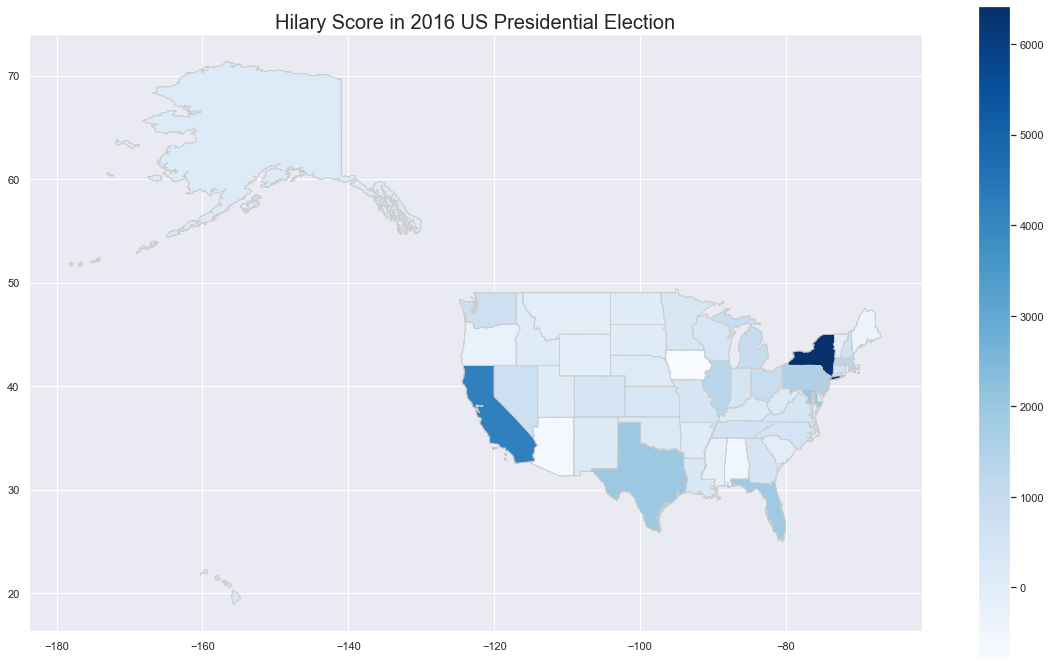

In [247]:
# Join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('STATE_ABBR').join(merged_df.set_index('state_code'))

# Set a variable
variable = "hilary_score"
vmin, vmax = merged_df["hilary_score"].min(), merged_df["hilary_score"].max() # set the range for the choropleth

# Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column = variable, cmap='Blues', linewidth=0.8, ax = ax, edgecolor='0.8')
ax.set_title("Hilary Score in 2016 US Presidential Election", fontdict={'fontsize': '20', 'fontweight' : '3'})
# ax.annotate("Source: US Census Gov, 2016",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize= "12", color= "#555555")

# Color bar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = [] # empty array for the data range
cbar = fig.colorbar(sm) # add the colorbar to the figure

#plt.tight_layout()
plt.savefig('Hillary Score in 2016 US Presidential Election.png', dpi=300)
plt.show()

### Another map by sentiment score (Please skip this part onwards)

In [83]:
gap_df = merged_df[["state_code","population", "trump_score", "hilary_score", "Candidate","vote_obtained_ratio", "Clinton","Trump" ]]
gap_df = gap_df[gap_df["Candidate"].isin(["Clinton", "Trump"])]
gap_df.head()

,state_code,population,trump_score,hilary_score,Candidate,vote_obtained_ratio,Clinton,Trump
1,AL,4863525,1201.0,-533.0,Clinton,0.345538,0,1
4,AL,4863525,1201.0,-533.0,Trump,0.628884,0,1
6,AK,741456,-184.0,158.0,Clinton,0.377176,0,1
9,AK,741456,-184.0,158.0,Trump,0.528878,0,1
11,AZ,6941072,1616.0,-641.0,Clinton,0.453240,0,1


In [316]:
# Score gap: positve represents more pro Clinton, negative represents more pro Trump

gap_df["score_gap"] = gap_df["hilary_score"] - gap_df["trump_score"]
gap_df.head(5)

,state_code,population,trump_score,hilary_score,Candidate,vote_obtained_ratio,Clinton,Trump,score_gap,normalized_gap,log
1,AL,4863525,1201.0,-533.0,Clinton,0.345538,0,1,-1734.0,-1.528177,6.641182
4,AL,4863525,1201.0,-533.0,Trump,0.628884,0,1,-1734.0,-1.528177,6.641182
6,AK,741456,-184.0,158.0,Clinton,0.377176,0,1,342.0,-0.169107,7.952263
9,AK,741456,-184.0,158.0,Trump,0.528878,0,1,342.0,-0.169107,7.952263
11,AZ,6941072,1616.0,-641.0,Clinton,0.453240,0,1,-2257.0,-1.870564,5.493061


In [317]:
gap_df.loc[gap_df.score_gap.idxmax():].head()

,state_code,population,trump_score,hilary_score,Candidate,vote_obtained_ratio,Clinton,Trump,score_gap,normalized_gap,log
161,NY,19633428,-1654.0,6417.0,Clinton,0.588324,1,0,8071.0,4.890745,9.265870
164,NY,19633428,-1654.0,6417.0,Trump,0.374513,1,0,8071.0,4.890745,9.265870
166,NC,10154788,390.0,498.0,Clinton,0.467024,0,1,108.0,-0.322297,7.866339
169,NC,10154788,390.0,498.0,Trump,0.505372,0,1,108.0,-0.322297,7.866339
171,ND,754434,-8.0,41.0,Clinton,0.277552,0,1,49.0,-0.360922,7.843456


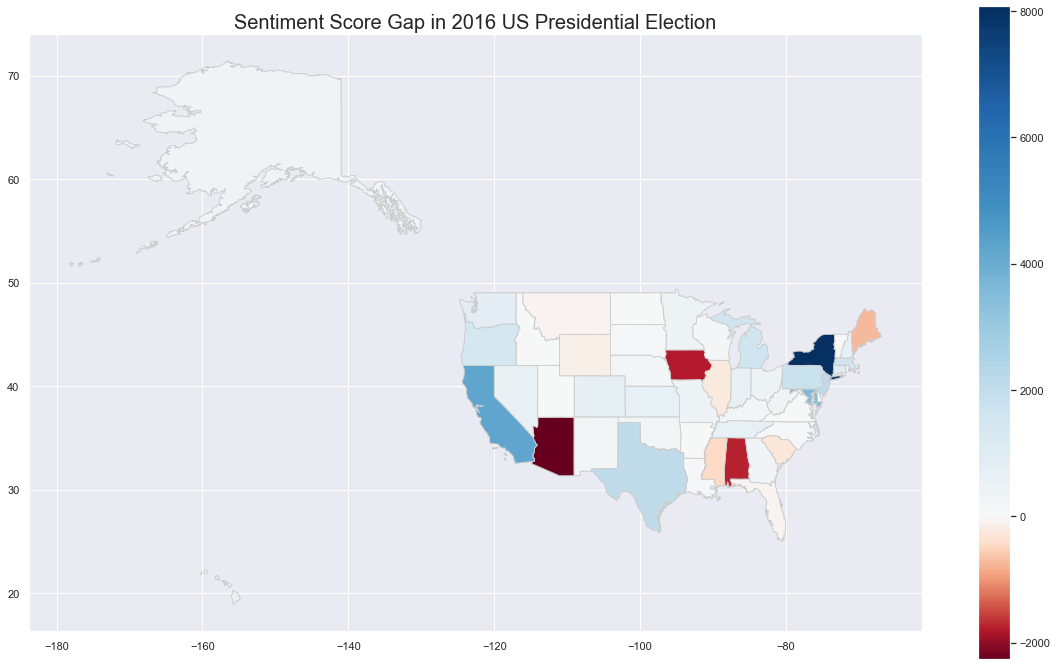

In [274]:
import matplotlib as mpl

# Join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('STATE_ABBR').join(gap_df.set_index('state_code'))

# Set a variable
variable = "score_gap"
vmin = gap_df[variable].min()
vmax = gap_df[variable].max() # set the range for the choropleth

# Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column = variable, cmap='RdBu', linewidth=0.8, ax = ax, edgecolor='0.8', norm = mpl.colors.TwoSlopeNorm(vmin = vmin, vcenter= 0.0, vmax = vmax ))
ax.set_title("Sentiment Score Gap in 2016 US Presidential Election", fontdict={'fontsize': '20', 'fontweight' : '3'})
#ax.annotate("Source: US Census Gov, 2016",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize= "12", color= "#555555")

# Color bar
#sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm = plt.cm.ScalarMappable(cmap='RdBu', norm = mpl.colors.TwoSlopeNorm(vmin = vmin, vcenter= 0.0, vmax = vmax ))

sm._A = [] # empty array for the data range
cbar = fig.colorbar(sm) # add the colorbar to the figure

plt.savefig('Sentiment Score Gap in 2016 US Presidential Election.png', dpi=300)
plt.show()

In [271]:
# Log 

gap_df["log"] = gap_df["score_gap"].apply(lambda x: np.log(x+2500))
plt.hist(gap_df.log.unique())

,state_code,population,trump_score,hilary_score,Candidate,vote_obtained_ratio,Clinton,Trump,score_gap,normalized_gap,log
1,AL,4863525,1201.0,-533.0,Clinton,0.345538,0,1,-1734.0,-1.528177,6.641182
4,AL,4863525,1201.0,-533.0,Trump,0.628884,0,1,-1734.0,-1.528177,6.641182
6,AK,741456,-184.0,158.0,Clinton,0.377176,0,1,342.0,-0.169107,7.952263
9,AK,741456,-184.0,158.0,Trump,0.528878,0,1,342.0,-0.169107,7.952263
11,AZ,6941072,1616.0,-641.0,Clinton,0.453240,0,1,-2257.0,-1.870564,5.493061


In [93]:
# Normalize 

gap_df["normalized_gap"] =(gap_df["score_gap"] - gap_df["score_gap"].mean())/gap_df["score_gap"].std()
gap_df.head()

,state_code,population,trump_score,hilary_score,Candidate,vote_obtained_ratio,Clinton,Trump,score_gap,normalized_gap,log
1,AL,4863525,1201.0,-533.0,Clinton,0.345538,0,1,-1734.0,-1.528177,6.641182
4,AL,4863525,1201.0,-533.0,Trump,0.628884,0,1,-1734.0,-1.528177,6.641182
6,AK,741456,-184.0,158.0,Clinton,0.377176,0,1,342.0,-0.169107,7.952263
9,AK,741456,-184.0,158.0,Trump,0.528878,0,1,342.0,-0.169107,7.952263
11,AZ,6941072,1616.0,-641.0,Clinton,0.453240,0,1,-2257.0,-1.870564,5.493061


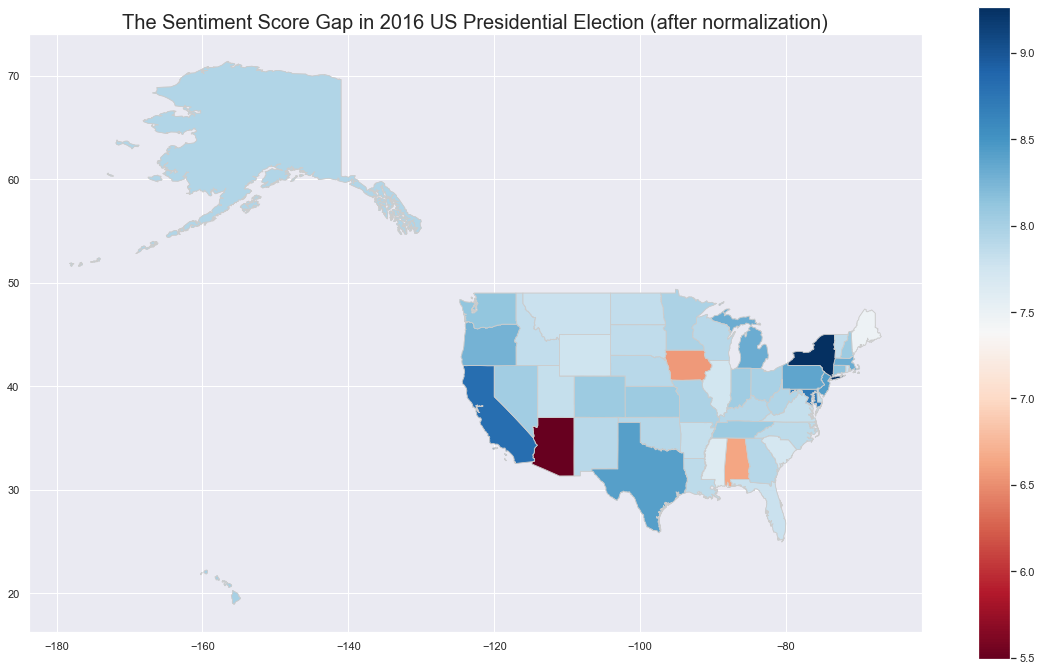

In [94]:
# Join the geodataframe with the cleaned up csv dataframe

merged = map_df.set_index('STATE_ABBR').join(gap_df.set_index('state_code'))

# Set a variable
variable = "log"
vmin = gap_df["log"].min()
vmax = gap_df["log"].max() # set the range for the choropleth

# Plot
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column = variable, cmap='RdBu', linewidth=0.8, ax = ax, edgecolor='0.8')
ax.set_title("The Sentiment Score Gap in 2016 US Presidential Election (after log)", fontdict={'fontsize': '20', 'fontweight' : '3'})
#ax.annotate("Source: US Census Gov, 2016",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize= "12", color= "#555555")

# Color bar
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = [] # empty array for the data range
cbar = fig.colorbar(sm) # add the colorbar to the figure

plt.show()

### Sentiment analysis 

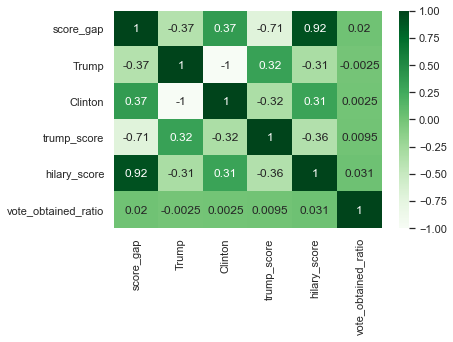

In [82]:
# Plot a heatmap for correlation 

gap_list = ["score_gap","Trump", "Clinton", "trump_score" ,"hilary_score", "vote_obtained_ratio"] # Inspect columns with sentiments labels and states
corr = gap_df[gap_list].corr() # Factorize the catergorical variable
corr

sns.set(font_scale=1)
sns.heatmap(corr, cmap="Greens", annot=True, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Correlation between the likelihood of winning and score gap

In [181]:
# Examine the mean for sentiment variable

check_list = ["trump_score","hilary_score", "trump_pos_ratio","trump_neg_ratio", "hilary_pos_ratio","hilary_neg_ratio",
             "unique_user_counts","tweet_per_user"]

hilary_df = hilary_df[hilary_df["Candidate"] == "Clinton"]
trump_df = trump_df[trump_df["Candidate"] == "Trump"] 

hilary_df[check_list].mean()
trump_df[check_list].mean()

trump_score             25.333333
hilary_score           625.647059
trump_pos_ratio          0.234696
trump_neg_ratio          0.233563
hilary_pos_ratio         0.273913
hilary_neg_ratio         0.200855
unique_user_counts    1057.686275
tweet_per_user           7.084066
dtype: float64

In [334]:
all_mean = pd.concat([hilary_df[check_list].mean(), trump_df[check_list].mean()], axis = 1) 
round(all_mean.rename(columns={0:"Hillary Winning States", 1:"Trump Winning States"}),2)

,Hillary Winning States,Trump Winning States
trump_score,-228.62,203.10
hilary_score,1049.19,329.17
trump_pos_ratio,0.22,0.24
trump_neg_ratio,0.25,0.22
hilary_pos_ratio,0.29,0.26
hilary_neg_ratio,0.19,0.21
unique_user_counts,1333.38,864.70
tweet_per_user,7.40,6.86
